In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import scipy
import scipy.fftpack
import copy


---
FIR filters with firls
---


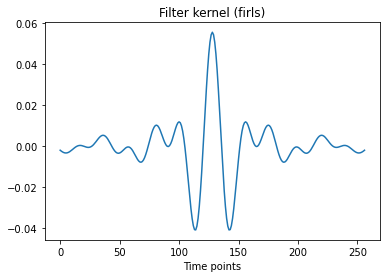

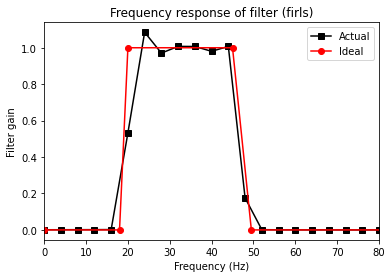

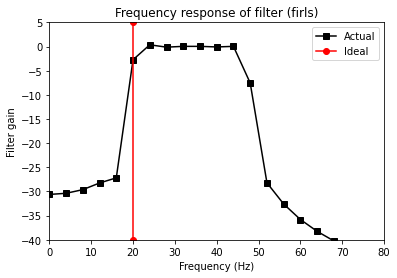

In [8]:
# filter parameters
srate   = 1024 # hz
nyquist = srate/2
frange  = [20,45]
transw  = .1
order   = int( 5*srate/frange[0] )

# order must be odd
if order%2==0:
    order += 1

# define filter shape
shape = [ 0, 0, 1, 1, 0, 0 ]
frex  = [ 0, frange[0]-frange[0]*transw, frange[0], frange[1], frange[1]+frange[1]*transw, nyquist ]

# filter kernel
filtkern = signal.firls(order,frex,shape,fs=srate)


# time-domain filter kernel
plt.plot(filtkern)
plt.xlabel('Time points')
plt.title('Filter kernel (firls)')
plt.show()




# compute the power spectrum of the filter kernel
filtpow = np.abs(scipy.fftpack.fft(filtkern))**2
# compute the frequencies vector and remove negative frequencies
hz      = np.linspace(0,srate/2,int(np.floor(len(filtkern)/2)+1))
filtpow = filtpow[0:len(hz)]



# plot amplitude spectrum of the filter kernel
plt.plot(hz,filtpow,'ks-',label='Actual')
plt.plot(frex,shape,'ro-',label='Ideal')
plt.xlim([0,frange[0]*4])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Filter gain')
plt.legend()
plt.title('Frequency response of filter (firls)')
plt.show()



# Same as above but logarithmically scaled
plt.plot(hz,10*np.log10(filtpow),'ks-',label='Actual')
plt.plot([frange[0],frange[0]],[-40,5],'ro-',label='Ideal')
plt.xlim([0,frange[0]*4])
plt.ylim([-40,5])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Filter gain')
plt.legend()
plt.title('Frequency response of filter (firls)')
plt.show()

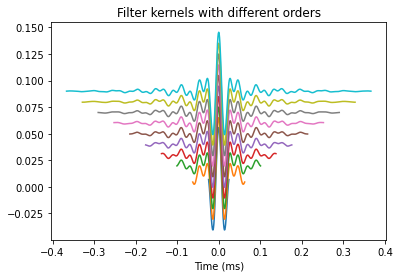

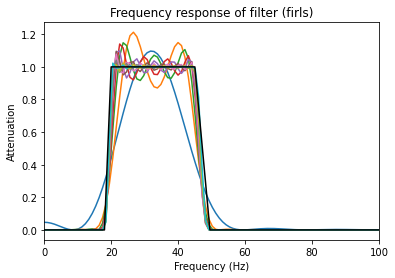

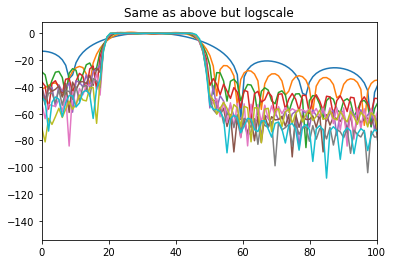

In [9]:
## effects of the filter kernel order

# range of orders
ordersF = ( 1*srate/frange[0]) / (srate/1000)
ordersL = (15*srate/frange[0]) / (srate/1000)

orders = np.round( np.linspace(ordersF,ordersL,10) )

# initialize
fkernX = np.zeros((len(orders),1000))
hz = np.linspace(0,srate,1000)


for oi in range(0,len(orders)):
    
    # make sure order is odd-length
    ord2use = orders[oi]+(1-orders[oi]%2)
    
    # create filter kernel
    fkern = signal.firls(ord2use,frex,shape,fs=srate)

    # take its FFT
    fkernX[oi,:] = np.abs(scipy.fftpack.fft(fkern,1000))**2
    
    # show in plot
    time = np.arange(0,ord2use)/srate
    time = time - np.mean(time)
    plt.plot(time,fkern+.01*oi)

plt.xlabel('Time (ms)')
plt.title('Filter kernels with different orders')
plt.show()

plt.plot(hz,fkernX.T)
plt.plot(frex,shape,'k')
plt.xlim([0,100])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Attenuation')
plt.title('Frequency response of filter (firls)')
plt.show()

plt.plot(hz,10*np.log10(fkernX.T))
plt.xlim([0,100])
plt.title('Same as above but logscale')
plt.show()

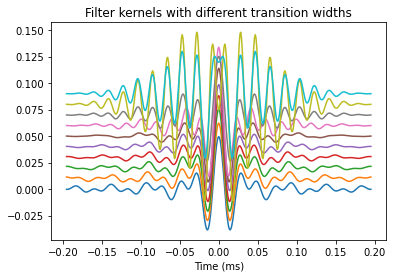

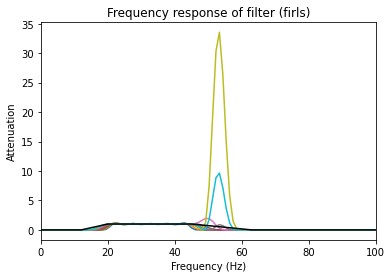

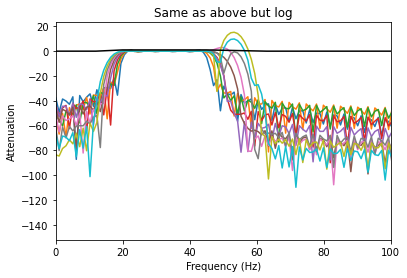

In [10]:
## effects of the filter transition width

# range of transitions
transwidths = np.linspace(.01,.4,10)

# initialize
fkernX = np.zeros((len(transwidths),1000))
hz = np.linspace(0,srate,1000)

for ti in range(0,len(transwidths)):
    
    # create filter kernel
    frex  = [ 0, frange[0]-frange[0]*transwidths[ti], frange[0], frange[1], frange[1]+frange[1]*transwidths[ti], nyquist ]
    fkern = signal.firls(401,frex,shape,fs=srate)
    n     = len(fkern)

    # take its FFT
    fkernX[ti,:] = np.abs(scipy.fftpack.fft(fkern,1000))**2
    
    # show in plot
    time = np.arange(0,401)/srate
    time = time - np.mean(time)
    plt.plot(time,fkern+.01*ti)
    
plt.xlabel('Time (ms)')
plt.title('Filter kernels with different transition widths')
plt.show()


plt.plot(hz,fkernX.T)
plt.plot(frex,shape,'k')
plt.xlim([0,100])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Attenuation')
plt.title('Frequency response of filter (firls)')
plt.show()


plt.plot(hz,10*np.log10(fkernX.T))
plt.plot(frex,shape,'k')
plt.xlim([0,100])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Attenuation')
plt.title('Same as above but log')
plt.show()


---
# FIR filters with fir1
---


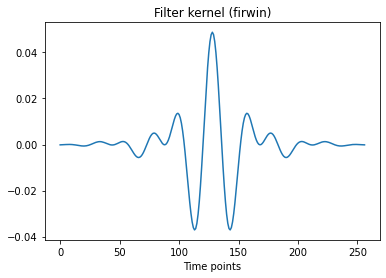

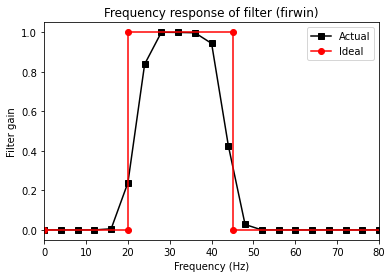

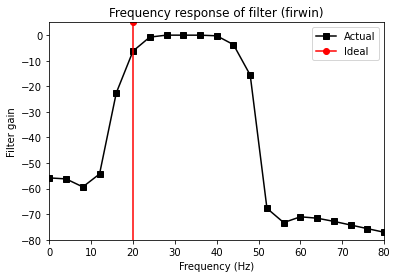

In [11]:
# filter parameters
srate   = 1024 # hz
nyquist = srate/2
frange  = [20,45]
transw  = .1
order   = int( 5*srate/frange[0] )

# force odd order
if order%2==0:
    order += 1

### --- NOTE: Python's firwin corresponds to MATLAB's fir1 --- ###

# filter kernel
filtkern = signal.firwin(order,frange,fs=srate,pass_zero=False)


# time-domain filter kernel
plt.plot(filtkern)
plt.xlabel('Time points')
plt.title('Filter kernel (firwin)')
plt.show()




# compute the power spectrum of the filter kernel
filtpow = np.abs(scipy.fftpack.fft(filtkern))**2
# compute the frequencies vector and remove negative frequencies
hz      = np.linspace(0,srate/2,int(np.floor(len(filtkern)/2)+1))
filtpow = filtpow[0:len(hz)]



# plot amplitude spectrum of the filter kernel
plt.plot(hz,filtpow,'ks-',label='Actual')
plt.plot([0,frange[0],frange[0],frange[1],frange[1],nyquist],[0,0,1,1,0,0],'ro-',label='Ideal')
plt.xlim([0,frange[0]*4])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Filter gain')
plt.legend()
plt.title('Frequency response of filter (firwin)')
plt.show()



# Same as above but logarithmically scaled
plt.plot(hz,10*np.log10(filtpow),'ks-',label='Actual')
plt.plot([frange[0],frange[0]],[-100,5],'ro-',label='Ideal')
plt.xlim([0,frange[0]*4])
plt.ylim([-80,5])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Filter gain')
plt.legend()
plt.title('Frequency response of filter (firwin)')
plt.show()

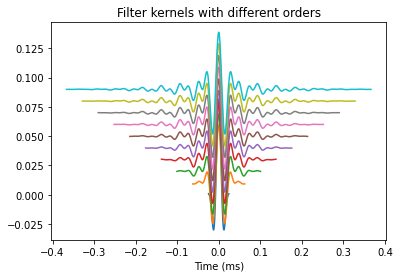

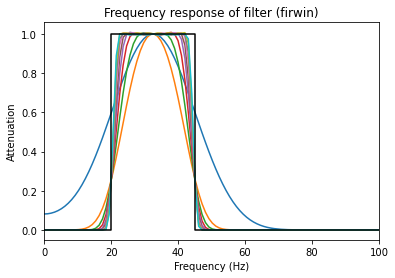

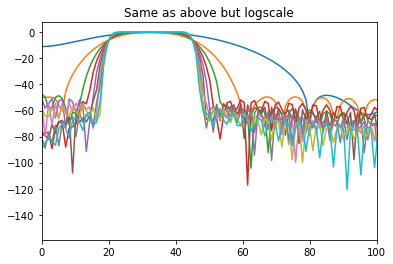

In [12]:
## effects of the filter kernel order

# range of orders
orders = np.round( np.linspace( (srate/frange[0]) / (srate/1000),(15*srate/frange[0]) / (srate/1000) ,10) )


# initialize
fkernX = np.zeros((len(orders),1000))
hz = np.linspace(0,srate,1000)


for oi in range(0,len(orders)):
    
    # make sure order is odd-length
    ord2use = orders[oi]+(1-orders[oi]%2)
    
    # create filter kernel
    fkern = signal.firwin(int(ord2use),frange,fs=srate,pass_zero=False)

    # take its FFT
    fkernX[oi,:] = np.abs(scipy.fftpack.fft(fkern,1000))**2
    
    # show in plot
    time = np.arange(0,ord2use)/srate
    time = time - np.mean(time)
    plt.plot(time,fkern+.01*oi)

plt.xlabel('Time (ms)')
plt.title('Filter kernels with different orders')
plt.show()

plt.plot(hz,fkernX.T)
plt.plot([0,frange[0],frange[0],frange[1],frange[1],nyquist],[0,0,1,1,0,0],'k')
plt.xlim([0,100])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Attenuation')
plt.title('Frequency response of filter (firwin)')
plt.show()

plt.plot(hz,10*np.log10(fkernX.T))
plt.xlim([0,100])
plt.title('Same as above but logscale')
plt.show()


---
# IIR Butterworth filters
---


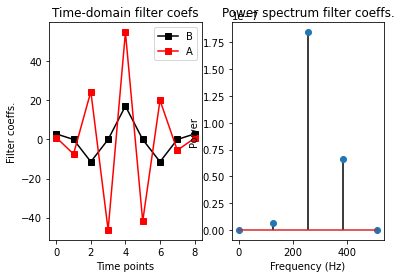

In [13]:

# filter parameters
srate   = 1024 # hz
nyquist = srate/2
frange  = [20,45]

# create filter coefficients
fkernB,fkernA = signal.butter(4,np.array(frange)/nyquist,btype='bandpass')

# power spectrum of filter coefficients
filtpow = np.abs(scipy.fftpack.fft(fkernB))**2
hz      = np.linspace(0,srate/2,int(np.floor(len(fkernB)/2)+1))


# plotting
plt.subplot(121)
plt.plot(fkernB*1e5,'ks-',label='B')
plt.plot(fkernA,'rs-',label='A')
plt.xlabel('Time points')
plt.ylabel('Filter coeffs.')
plt.title('Time-domain filter coefs')
plt.legend()

plt.subplot(122)
plt.stem(hz,filtpow[0:len(hz)],'ks-')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.title('Power spectrum filter coeffs.')
plt.show()


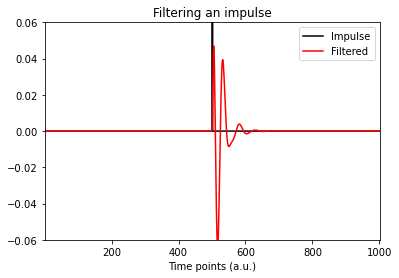

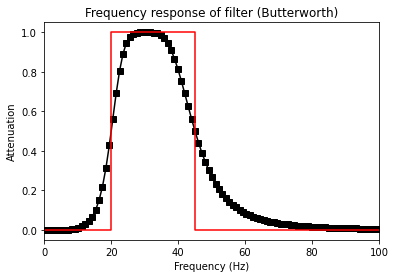

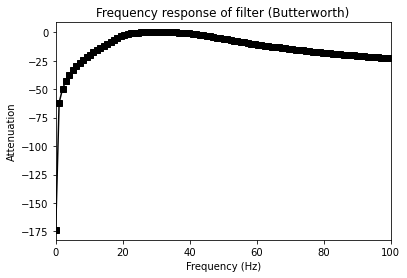

In [15]:
## how to evaluate an IIR filter: filter an impulse

# generate the impulse
impres = np.zeros(1001)
impres[501] = 1

# apply the filter
fimp = signal.lfilter(fkernB,fkernA,impres,axis=-1)

# compute power spectrum
fimpX = np.abs(scipy.fftpack.fft(fimp))**2
hz = np.linspace(0,nyquist,int(np.floor(len(impres)/2)+1))


# plot
plt.plot(impres,'k',label='Impulse')
plt.plot(fimp,'r',label='Filtered')
plt.xlim([1,len(impres)])
plt.ylim([-.06,.06])
plt.legend()
plt.xlabel('Time points (a.u.)')
plt.title('Filtering an impulse')
plt.show()

plt.plot(hz,fimpX[0:len(hz)],'ks-')
plt.plot([0,frange[0],frange[0],frange[1],frange[1],nyquist],[0,0,1,1,0,0],'r')
plt.xlim([0,100])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Attenuation')
plt.title('Frequency response of filter (Butterworth)')
plt.show()


plt.plot(hz,10*np.log10(fimpX[0:len(hz)]),'ks-')
plt.xlim([0,100])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Attenuation')
plt.title('Frequency response of filter (Butterworth)')
plt.show()

<ipython-input-16-bb377570213e>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(121)
<ipython-input-16-bb377570213e>:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(122)
<ipython-input-16-bb377570213e>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and return

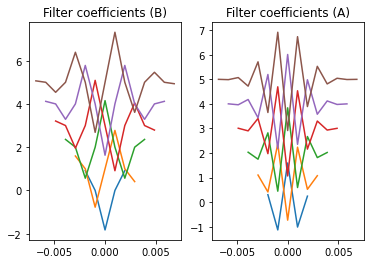

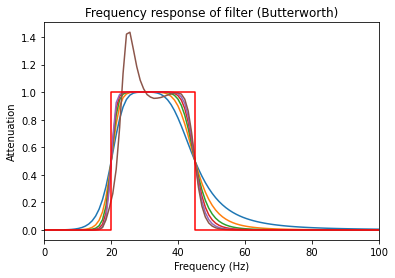

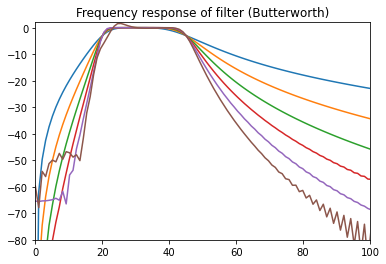

In [16]:
## effects of order parameter

orders = range(2,8)

fkernX = np.zeros((len(orders),1001))
hz = np.linspace(0,srate,1001)


# loop over orders
for oi in range(0,len(orders)):
    
    # create filter kernel
    fkernB,fkernA = signal.butter(orders[oi],np.array(frange)/nyquist,btype='bandpass')
    n = len(fkernB)
    
    # filter the impulse response and take its power
    fimp = signal.lfilter(fkernB,fkernA,impres,axis=-1)
    fkernX[oi,:] = np.abs(scipy.fftpack.fft(fimp))**2
    
    
    # show in plot
    time = np.arange(0,len(fkernB))/srate
    time = time - np.mean(time)
    plt.subplot(121)
    plt.plot(time,scipy.stats.zscore(fkernB)+oi)
    plt.title('Filter coefficients (B)')
    
    plt.subplot(122)
    plt.plot(time,scipy.stats.zscore(fkernA)+oi)
    plt.title('Filter coefficients (A)')

plt.show()


# plot the spectra
plt.plot(hz,fkernX.T)
plt.plot([0,frange[0],frange[0],frange[1],frange[1],nyquist],[0,0,1,1,0,0],'r')
plt.xlim([0,100])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Attenuation')
plt.title('Frequency response of filter (Butterworth)')
plt.show()

# in log space
plt.plot(hz,10*np.log10(fkernX.T))
plt.xlim([0,100])
plt.ylim([-80,2])
plt.title('Frequency response of filter (Butterworth)')
plt.show()